In [1]:
# load data/cleaned_data/merged_df.parquet and put it into variable merged_df
import pandas as pd

merged_df = pd.read_parquet('data/cleaned_data/merged_df.parquet')

In [2]:
import datetime as dt

def convert_timestamp_to_numerical(dataset):
    dataset = dataset.copy()
    dataset['day'] = dataset['timestamp'].dt.day
    dataset['month'] = dataset['timestamp'].dt.month
    # dataset['year'] = dataset['timestamp'].dt.year
    dataset['dayofweek'] = dataset['timestamp'].dt.dayofweek
    dataset['hour'] = dataset['timestamp'].dt.hour
    # dataset['date'] = pd.to_datetime(dataset['timestamp'])
    # dataset['date'] = dataset['date'].map(dt.datetime.toordinal)
    # dataset['minute'] = dataset['timestamp'].dt.minute

    # in dataset, timestamp is the first column. put day, month, dayofweek, hour behind timestamp
    cols = dataset.columns.tolist()
    cols = cols[0:1] + cols[-4:] + cols[1:-4]
    dataset = dataset[cols]
    
    return dataset

In [3]:
# column name of polygon_1663 to rainfall
merged_df.rename(columns={'precipitation': 'rainfall_current'}, inplace=True)

# sum up the rainfall_current of the previous 24 records and put it into a new column rainfall_previous_24, do not include the current record
merged_df['rainfall_previous_2_hours'] = merged_df['rainfall_current'].rolling(25).sum() - merged_df['rainfall_current']
merged_df['rainfall_previous_2_hours'].fillna(0, inplace=True)

# column name of percentage to current percentage
merged_df.rename(columns={'percentage': 'percentage_current'}, inplace=True)
# the percentage of the previous 6 records in new columns
for shift_rate in range(1, 7):
    merged_df[f'percentage_previous_{shift_rate}'] = merged_df['percentage_current'].shift(shift_rate)
    merged_df[f'percentage_previous_{shift_rate}'].fillna(0, inplace=True)

# rainfall_lag_start = 12
# # now shift rainfall_current an use a for loop to create rainfall_previous_1 to rainfall_previous_6
# for shift_rate in range(1, 7):
#     merged_df[f'rainfall_previous_{shift_rate}'] = merged_df['rainfall_current'].shift(shift_rate + rainfall_lag_start)
#     merged_df[f'rainfall_previous_{shift_rate}'].fillna(0, inplace=True)

    
# # the difference between the current percentage and the previous 6 percentage in new columns
# for shift_rate in range(1, 7):
#     merged_df[f'percentage_difference_{shift_rate}'] = merged_df['percentage_current'].shift(shift_rate) - merged_df['percentage_current'].shift(shift_rate + 1)
#     merged_df[f'percentage_difference_{shift_rate}'].fillna(0, inplace=True)

merged_df = convert_timestamp_to_numerical(merged_df)

# print columns types
print(merged_df.dtypes)
merged_df

timestamp                    datetime64[ns]
day                                   int32
month                                 int32
dayofweek                             int32
hour                                  int32
rainfall_current                    float64
percentage_current                  float64
rainfall_previous_2_hours           float64
percentage_previous_1               float64
percentage_previous_2               float64
percentage_previous_3               float64
percentage_previous_4               float64
percentage_previous_5               float64
percentage_previous_6               float64
dtype: object


,timestamp,day,month,dayofweek,hour,rainfall_current,percentage_current,rainfall_previous_2_hours,percentage_previous_1,percentage_previous_2,percentage_previous_3,percentage_previous_4,percentage_previous_5,percentage_previous_6
0,2019-01-01 00:00:00,1,1,1,0,0.000000,7.895,0.000000,0.000,0.000,0.000,0.000,0.000,0.000
1,2019-01-01 00:05:00,1,1,1,0,0.000000,7.895,0.000000,7.895,0.000,0.000,0.000,0.000,0.000
2,2019-01-01 00:10:00,1,1,1,0,0.000000,7.895,0.000000,7.895,7.895,0.000,0.000,0.000,0.000
3,2019-01-01 00:15:00,1,1,1,0,0.000000,7.895,0.000000,7.895,7.895,7.895,0.000,0.000,0.000
4,2019-01-01 00:20:00,1,1,1,0,0.000000,7.895,0.000000,7.895,7.895,7.895,7.895,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498217,2023-10-12 23:35:00,12,10,3,23,0.010010,2.632,0.080078,2.632,2.632,2.632,2.632,2.632,2.632
498218,2023-10-12 23:40:00,12,10,3,23,0.039978,2.632,0.090088,2.632,2.632,2.632,2.632,2.632,2.632
498219,2023-10-12 23:45:00,12,10,3,23,0.049988,2.632,0.130066,2.632,2.632,2.632,2.632,2.632,2.632
498220,2023-10-12 23:50:00,12,10,3,23,0.039978,2.632,0.180054,2.632,2.632,2.632,2.632,2.632,2.632


In [4]:
# # from merged def, give me timestamp, rainfall_current, rainfall_previous_2_hours
# rain_fall_previous_df = merged_df[['timestamp', 'rainfall_current', 'rainfall_previous_2_hours']]

# # write to excel file
# rain_fall_previous_df.to_excel('data/cleaned_data/rainfall_previous_2_hours.xlsx', index=False)


In [5]:
# # give me the records in merged_df of 1 and 2 january
# january_1_df = merged_df.loc[(merged_df['day'] == 1) & (merged_df['month'] == 1)]

# # write this to excel file
# january_1_df.to_excel('data/cleaned_data/january_1_df.xlsx', index=False)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from datetime import datetime
import matplotlib.pyplot as plt
import time
import pickle

In [7]:
# features = ['percentage_previous_1', 'percentage_previous_2', 'percentage_previous_3']
date_features = ['day', 'month', 'dayofweek', 'hour']
rainfall_features = ['rainfall_current', 'rainfall_previous_2_hours']
rainfall_previous_features = ['rainfall_previous_1', 'rainfall_previous_2', 'rainfall_previous_3', 'rainfall_previous_4', 'rainfall_previous_5', 'rainfall_previous_6'] 
percentage_previous_features = ['percentage_previous_1', 'percentage_previous_2', 'percentage_previous_3', 'percentage_previous_4', 'percentage_previous_5', 'percentage_previous_6']
percentage_difference_features = ['percentage_difference_1', 'percentage_difference_2', 'percentage_difference_3', 'percentage_difference_4', 'percentage_difference_5', 'percentage_difference_6', 'percentage_difference_7', 'percentage_difference_8', 'percentage_difference_9', 'percentage_difference_10', 'percentage_difference_11', 'percentage_difference_12']
# put the values in above arrays in one array
features = date_features + rainfall_features + percentage_previous_features

train_model = False

linear_model = True
ridge_model = False
lasso_model = False
elastic_net_model = False
polynomial_model = False
random_forest_model = False

features

['day',
 'month',
 'dayofweek',
 'hour',
 'rainfall_current',
 'rainfall_previous_2_hours',
 'percentage_previous_1',
 'percentage_previous_2',
 'percentage_previous_3',
 'percentage_previous_4',
 'percentage_previous_5',
 'percentage_previous_6']

In [8]:
# Define the features and target variables to be used
X = merged_df[features]
y = merged_df['percentage_current']

# scale the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41, shuffle=False)

if train_model:
    # save scaler to folder models\linear_regression, with a timestamp in the name
    filename = 'scalers/scaler_' + datetime.now().strftime("%Y%m%d-%H%M%S") + '.pkl'
    pickle.dump(scaler, open(filename, 'wb'))

    def scale_features(features):
        return scaler.transform(features)

In [9]:
# def temp(merged_df, features):
#  #  Define the features and target variables to be used
#     X = merged_df[features]
#     y = merged_df['percentage_current']

#     # scale the features
#     scaler = StandardScaler()
#     scaler.fit(X)
#     X = scaler.transform(X)

#     # Create the training and test sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41, shuffle=False)

#     return X_train, X_test, y_train, y_test, scaler

In [10]:
def test_model(model, X_test, y_test, predictions):
    # Calculate the accuracy of the model
    accuracy = model.score(X_test, y_test)
    accuracy = round(accuracy * 100, 2)
    print(f"Accuracy: {accuracy}%")

    # Calculate the mean squared error of the model
    mse = mean_squared_error(y_test, predictions)
    print(f"Mean squared error: {mse}")

    # Calculate the R-Squared score of the model
    print('Variance (R²) score: %.2f' % r2_score(y_test, predictions))

def save_to_pickle_file(file, filename):
    pickle.dump(file, open(filename, 'wb'))

def plot_predicted_vs_actual(y_test, predictions):
    # Plot the predictions against the actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions)
    plt.xlabel('Actual percentage')
    plt.ylabel('Predicted percentage')
    plt.title('Predicted percentage vs. Actual percentage')
    plt.show()

In [11]:
# global scaler
# global best_accuracy
# global best_model
# global best_y_test
# global best_predictions
# best_accuracy = 0
# best_model = None
# best_y_test = None
# best_predictions = None

# if(train_model and (linear_model or ridge_model or lasso_model or elastic_net_model)):
#     for i in range(0, 121):
#         for j in range(2, 121):
#             print(f"i: {i}, j: {j}")
#             # sum up the rainfall_current of the previous 24 records and put it into a new column rainfall_previous_24, do not include the current record
#             merged_df['rainfall_previous_2_hours'] = merged_df['rainfall_current'].shift(i).rolling(j).sum() - merged_df['rainfall_current'].shift(i)
#             merged_df['rainfall_previous_2_hours'].fillna(0, inplace=True)

#             X_train, X_test, y_train, y_test, scaler = temp(merged_df, features)

#             model_type = None

#             if(linear_model):
#                 # Create the linear regression model and train/fit it
#                 model = LinearRegression()
#                 model.fit(X_train, y_train)
#                 model_type = 'linear_regression'
#             elif(ridge_model):
#                 # Create the ridge regression model and train/fit it, use GridSearchCV to find the best alpha
#                 model = Ridge()
#                 parameters = {'alpha': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]}
#                 ridge_regressor = GridSearchCV(model, parameters, n_jobs=3)
#                 ridge_regressor.fit(X_train, y_train)
#                 print(ridge_regressor.best_params_)
#                 model = ridge_regressor.best_estimator_
#                 model_type = 'ridge_regression'
#             elif(lasso_model):
#                 # Create the lasso regression model and train/fit it, use GridSearchCV to find the best alpha
#                 model = Lasso()
#                 parameters = {'alpha': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]}
#                 lasso_regressor = GridSearchCV(model, parameters, n_jobs=3)
#                 lasso_regressor.fit(X_train, y_train)
#                 print(lasso_regressor.best_params_)
#                 model = lasso_regressor.best_estimator_
#                 model_type = 'lasso_regression'
#             elif(elastic_net_model):
#                 # Create the elastic net regression model and train/fit it, use GridSearchCV to find the best alpha and l1_ratio
#                 model = ElasticNet()
#                 parameters = {'alpha': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], 'l1_ratio': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]}
#                 elastic_net_regressor = GridSearchCV(model, parameters, n_jobs=3)
#                 elastic_net_regressor.fit(X_train, y_train)
#                 print(elastic_net_regressor.best_params_)
#                 model = elastic_net_regressor.best_estimator_
#                 model_type = 'elastic_net_regression'

#             # Make predictions on the test set
#             predictions = model.predict(X_test)

#             # Test the model
#             # test_model(model, X_test, y_test, predictions)

#             # Calculate the accuracy of the model
#             accuracy_initial = model.score(X_test, y_test)

#             if(accuracy_initial > best_accuracy):
#                 best_accuracy = accuracy_initial
#                 best_model = model
#                 best_y_test = y_test
#                 best_predictions = predictions

#                 accuracy = round(accuracy_initial * 100, 2)
#                 print(f"Accuracy: {accuracy}%")

#                 # Calculate the mean squared error of the model
#                 mse = mean_squared_error(y_test, predictions)
#                 print(f"Mean squared error: {mse}")

#                 # Calculate the R-Squared score of the model
#                 print('Variance (R²) score: %.2f' % r2_score(y_test, predictions))


#             # # Plot the predictions against the actual values
#             # plot_predicted_vs_actual(y_test, predictions)

#             # # save model to folder models\linear_regression with a timestamp in the name
#             # filename = f'models/linear_regression/model_{model_type}_{datetime.now().strftime("%Y%m%d-%H%M%S")}.pkl'
#             # save_to_pickle_file(model, filename)

#     # Plot the predictions against the actual values
#     plot_predicted_vs_actual(best_y_test, best_predictions)

In [12]:
# model = best_model

## Linear models

In [13]:
if(train_model and (linear_model or ridge_model or lasso_model or elastic_net_model)):
    model_type = None

    if(linear_model):
        # Create the linear regression model and train/fit it
        model = LinearRegression()
        model.fit(X_train, y_train)
        model_type = 'linear_regression'
    elif(ridge_model):
        # Create the ridge regression model and train/fit it, use GridSearchCV to find the best alpha
        model = Ridge()
        parameters = {'alpha': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]}
        ridge_regressor = GridSearchCV(model, parameters, n_jobs=3)
        ridge_regressor.fit(X_train, y_train)
        print(ridge_regressor.best_params_)
        model = ridge_regressor.best_estimator_
        model_type = 'ridge_regression'
    elif(lasso_model):
        # Create the lasso regression model and train/fit it, use GridSearchCV to find the best alpha
        model = Lasso()
        parameters = {'alpha': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]}
        lasso_regressor = GridSearchCV(model, parameters, n_jobs=3)
        lasso_regressor.fit(X_train, y_train)
        print(lasso_regressor.best_params_)
        model = lasso_regressor.best_estimator_
        model_type = 'lasso_regression'
    elif(elastic_net_model):
        # Create the elastic net regression model and train/fit it, use GridSearchCV to find the best alpha and l1_ratio
        model = ElasticNet()
        parameters = {'alpha': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], 'l1_ratio': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]}
        elastic_net_regressor = GridSearchCV(model, parameters, n_jobs=3)
        elastic_net_regressor.fit(X_train, y_train)
        print(elastic_net_regressor.best_params_)
        model = elastic_net_regressor.best_estimator_
        model_type = 'elastic_net_regression'
    
    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Test the model
    test_model(model, X_test, y_test, predictions)

    # Plot the predictions against the actual values
    plot_predicted_vs_actual(y_test, predictions)

    # save model to folder models\linear_regression with a timestamp in the name
    filename = f'models/linear_regression/model_{model_type}_{datetime.now().strftime("%Y%m%d-%H%M%S")}.pkl'
    save_to_pickle_file(model, filename)

## Random forest

In [14]:
accuracy_score_highest = 0
best_y_test = None
best_predictions = None
best_model = None

if(train_model and random_forest_model):
    for n_estimators in range(1, 101):
        # for max_depth in range(1, 51):
            # Create the random forest model and train/fit it
        model = RandomForestRegressor(n_estimators=n_estimators, random_state=41)
        # model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth , random_state=41)

        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()

        time_in_minutes = round((end - start) / 60, 2)
        
        # Make predictions on the test set
        predictions = model.predict(X_test)

        accuracy = model.score(X_test, y_test)
        accuracy_score = round(accuracy * 100, 2)
        mean_squared_error_test = mean_squared_error(y_test, predictions)
        r2_score_test = r2_score(y_test, predictions)

        if (accuracy > accuracy_score_highest):
            print(f"---- n_estimators: {n_estimators} - time: {time_in_minutes} minutes")
            # print(f"---- n_estimators: {n_estimators} - max_depth: {max_depth} - time: {time_in_minutes} minutes")
            accuracy_score_highest = accuracy
            
            # get accuracy of the model
            print("Accuracy of the model: ", accuracy_score, "%")

            # test the model
            print("Mean squared error: %.2f" % mean_squared_error_test)
            print('Variance (R²) score: %.2f' % r2_score_test)

            # remove evertyhing in folder models\random_forest that starts with model_
            import os, glob
            files = glob.glob('models/random_forest/model_*')
            for f in files:
                os.remove(f)

            # save model to folder models\random_forest with a timestamp in the name
            filename = f'models/random_forest/model_rf_{n_estimators}.pkl'
            # filename = f'models/random_forest/model_{n_estimators}_{max_depth}.pkl'
            save_to_pickle_file(model, filename)

            best_y_test = y_test
            best_predictions = predictions
            best_model = model
        else:       
            print(f"---- n_estimators: {n_estimators} - time: {time_in_minutes} minutes")
            # print(f"---- n_estimators: {n_estimators} - max_depth: {max_depth} - time: {time_in_minutes} minutes")

    model = best_model

    # Plot the predictions against the actual values
    plot_predicted_vs_actual(y_test, predictions)

In [15]:
accuracy_score_highest = 0
best_y_test = None
best_predictions = None
best_model = None

if train_model and random_forest_model:
    # Define the parameter grid for GridSearchCV
    # param_grid = {
    #     'n_estimators': range(1, 1001)
    # }
       
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 51)
    }

    # Create the Random Forest model
    model = RandomForestRegressor(random_state=41)

    # Perform Grid Search to find the best hyperparameters
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1, verbose=3)
    grid_search.fit(X_train, y_train)

    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions on the test set using the best model
    best_predictions = best_model.predict(X_test)

    # Evaluate the best model
    accuracy_score = best_model.score(X_test, y_test) * 100
    mean_squared_error_test = mean_squared_error(y_test, best_predictions)
    r2_score_test = r2_score(y_test, best_predictions)

    print("Best parameters:", best_params)
    print("Accuracy of the best model: {:.2f}%".format(accuracy_score))
    print("Mean squared error: {:.2f}".format(mean_squared_error_test))
    print("Variance (R²) score: {:.2f}".format(r2_score_test))

    # Save the model

    filename = 'models/random_forest/best_model_' + datetime.now().strftime("%Y%m%d-%H%M%S") + '.pkl'
    save_to_pickle_file(best_model, filename)

    # Plot the predictions against the actual values
    plot_predicted_vs_actual(y_test, best_predictions)

In [16]:
if(train_model and not random_forest_model):
    # Plot the prediction power of the features that model is using, in a horizontal bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(features, model.coef_)
    plt.xlabel('Coefficient')
    plt.ylabel('Features')
    plt.title('Feature coefficients')
    plt.show()
elif(train_model and random_forest_model):
    # Plot the prediction power of the features that the random forest regression model is using, in a horizontal bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(features, model.feature_importances_)
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.title('Feature importance')
    plt.show()

In [17]:
# give me a record in merged_df where percentage current is 100, give me the first one
data_100 = merged_df[merged_df['percentage_current'] == 100].iloc[0]

# give me a record in merged_df where percentage current is between 45 and 55, give me the first one
# merged_df[(merged_df['percentage_current'] >= 45) & (merged_df['percentage_current'] <= 55)].iloc[0]

print(data_100)
# data_100 = data_100.reindex(['date'] + list(data_100.index[:-1]))
# data_100 = data_100.drop('timestamp')
# data_100 = data_100.drop('percentage_current')

timestamp                    2019-01-28 02:35:00
day                                           28
month                                          1
dayofweek                                      0
hour                                           2
rainfall_current                        0.139999
percentage_current                         100.0
rainfall_previous_2_hours               2.299995
percentage_previous_1                     96.491
percentage_previous_2                     95.614
percentage_previous_3                     95.614
percentage_previous_4                     95.614
percentage_previous_5                     94.737
percentage_previous_6                      93.86
Name: 7680, dtype: object


In [18]:
if(train_model):
    # prediction_1 = model.predict(scale_features([[6, 2, 2024, 1, 8, 0, 3.4, 0]]))
    # prediction_2 = model.predict(scale_features([[6, 2, 2024, 1, 8, 0, 3.4, 10]]))
    # prediction_3 = model.predict(scale_features([[6, 2, 2024, 1, 8, 0, 3.4, 0]]))
    # 'day', 'month', 'dayofweek', 'hour', 'rainfall_current', 'rainfall_previous_2_hours', 'percentage_previous_1', 'percentage_previous_2', 'percentage_previous_3',
    # 'percentage_previous_4', 'percentage_previous_5', 'percentage_previous_6'
    # rainfall_previous_array = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
    date_features_array = [28, 1, 0, 2]
    rainfall_features = [0.139999, 2.299995]
    rainfall_previous_feature_array = [0, 0, 0, 0, 0, 0]
    percentage_previous_feature_array = [96.4912, 95.614, 95.614, 95.614, 94.737, 93.86]
    percentage_difference_feature_array = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    input = pd.DataFrame([date_features_array + rainfall_features + percentage_previous_feature_array + rainfall_previous_feature_array], columns=features)
    # input = pd.DataFrame([data_100], columns=features)

    prediction_4 = model.predict(scale_features(input))

    # print(prediction_1)
    # print(prediction_2)
    # print(prediction_3)
    print(prediction_4)

In [19]:
# set every timestamp in merged_df to 6 months later, and put this in a new dataframe
weather_data_6_months_later = merged_df.copy()
weather_data_6_months_later['timestamp'] = weather_data_6_months_later['timestamp'] + pd.DateOffset(months=6)
# only give me timestamp and rainfall_current
weather_data_6_months_later = weather_data_6_months_later[['timestamp', 'rainfall_current', 'rainfall_previous_2_hours']]
weather_data_6_months_later

,timestamp,rainfall_current,rainfall_previous_2_hours
0,2019-07-01 00:00:00,0.000000,0.000000
1,2019-07-01 00:05:00,0.000000,0.000000
2,2019-07-01 00:10:00,0.000000,0.000000
3,2019-07-01 00:15:00,0.000000,0.000000
4,2019-07-01 00:20:00,0.000000,0.000000
...,...,...,...
498217,2024-04-12 23:35:00,0.010010,0.080078
498218,2024-04-12 23:40:00,0.039978,0.090088
498219,2024-04-12 23:45:00,0.049988,0.130066
498220,2024-04-12 23:50:00,0.039978,0.180054


In [20]:
def format_prediction(prediction):
    if(prediction < 0):
        return  0
    elif(prediction > 100):
        return  100
    else:
        return prediction

In [21]:
training_verbose = False

In [22]:
def data_to_input(dataset, percentages_previous, start_timestamp):
# def data_to_input(dataset, percentages_previous, percentage_difference, start_timestamp):
    data_specific_timestamp = dataset[dataset['timestamp'] == start_timestamp]
    data_specific_timestamp = convert_timestamp_to_numerical(data_specific_timestamp)
    day = data_specific_timestamp['day'].values[0]
    month = data_specific_timestamp['month'].values[0]
    dayofweek = data_specific_timestamp['dayofweek'].values[0]
    hour = data_specific_timestamp['hour'].values[0]
    # date = data_specific_timestamp['date'].values[0]
    date_features = [day, month, dayofweek, hour]

    rainfall_current = data_specific_timestamp["rainfall_current"].values[0]
    rainfall_previous_2_hours = data_specific_timestamp['rainfall_previous_2_hours'].values[0]
   
    percentage_previous_1 = percentages_previous[0]
    percentage_previous_2 = percentages_previous[1]
    percentage_previous_3 = percentages_previous[2]
    percentage_previous_4 = percentages_previous[3]
    percentage_previous_5 = percentages_previous[4]
    percentage_previous_6 = percentages_previous[5]
    percentage_previous_array = [percentage_previous_1, percentage_previous_2, percentage_previous_3, percentage_previous_4, percentage_previous_5, percentage_previous_6]

    # percentage_difference_1 = percentage_difference[0]
    # percentage_difference_2 = percentage_difference[1]
    # percentage_difference_3 = percentage_difference[2]
    # percentage_difference_4 = percentage_difference[3]
    # percentage_difference_5 = percentage_difference[4]
    # percentage_difference_6 = percentage_difference[5]
    # percentage_difference_7 = percentage_difference[6]
    # percentage_difference_8 = percentage_difference[7]
    # percentage_difference_9 = percentage_difference[8]
    # percentage_difference_10 = percentage_difference[9]
    # percentage_difference_11 = percentage_difference[10]
    # percentage_difference_12 = percentage_difference[11]
    # percentage_differences_array = [percentage_difference_1, percentage_difference_2, percentage_difference_3, percentage_difference_4, percentage_difference_5, percentage_difference_6, percentage_difference_7, percentage_difference_8, percentage_difference_9, percentage_difference_10, percentage_difference_11, percentage_difference_12]
 
    input_df = pd.DataFrame([date_features + [rainfall_current, rainfall_previous_2_hours] + percentage_previous_array], columns=features)

    if training_verbose:
        print('----INPUT_DF----\n', input_df.values)
    
    return input_df

In [23]:
def create_initial_predictions_df(start_timestamp, weather_data, model, scaler, polygon_id, range_previous_percentage):
    initial_timestamps_minus = []
    initial_previous_percentage = [0] * range_previous_percentage
    initial_differences_percentage = [0] * 12
    pre_predictions_df = None
    
    for i in range(1, range_previous_percentage+1):
        start_timestamp_minus = start_timestamp - pd.Timedelta(minutes=i*5)
        initial_timestamps_minus.append(start_timestamp_minus)
    
    # turn around initial_timestamps_minus
    initial_timestamps_minus.reverse()
    
    if training_verbose:
        print('------ PRE-PREDICTION DATES-------\n', initial_timestamps_minus)

    for start_timestamp_minus in initial_timestamps_minus:
        if training_verbose:
            print('------ CURRENT PRE-PREDICTION DATE:', start_timestamp_minus)
            
        weather_data_minus = convert_timestamp_to_numerical(weather_data[weather_data['timestamp'] == start_timestamp_minus])
        
        input_minus = data_to_input(weather_data_minus, initial_previous_percentage, start_timestamp_minus)
        # input_minus = data_to_input(weather_data_minus, initial_previous_percentage, initial_differences_percentage, start_timestamp_minus)
        # print('------input_minus-------', input_minus.filter(regex='percentage_previous_'))

        prediction_minus = format_prediction(model.predict(scaler.transform(input_minus))[0])

        if training_verbose:
            print('------CURRENT PRE-PREDICTION RESULT:', prediction_minus)

        # add prediction_minus to the front of initial_previous_percentage
        initial_previous_percentage.insert(0, prediction_minus)
        initial_previous_percentage.pop()

        # # add value to pre_percentage_differences and remove last value
        # initial_differences_percentage.insert(0, prediction_minus - initial_previous_percentage[1])
        # initial_differences_percentage.pop()

        # add record to pre_predictions_df
        pre_predictions_df = pd.concat([pre_predictions_df, pd.DataFrame([[start_timestamp_minus, prediction_minus, input_minus['rainfall_current'].values[0]]], columns=['timestamp', 'percentage_current', 'rainfall_current'])], ignore_index=True)

    return initial_previous_percentage, initial_differences_percentage, pre_predictions_df

def create_predictions_df(start_timestamp, end_timestamp, weather_data, model, scaler, polygon_id):
    if training_verbose:
        print('------------------------------------ PRE-PREDICTIONS ------------------------------------')   
    
    # Make the initial predictions (start_timestamp, weather_data, model, scaler, polygon_id, range_previous_percentage (per 5 minutes back))
    pre_percentage_predictions, pre_percentage_differences, pre_predictions_df = create_initial_predictions_df(start_timestamp, weather_data, model, scaler, polygon_id, 6)
    
    if training_verbose:
        print('------------------------------------ PREDICTIONS ------------------------------------')   
    
    # Create a boolean mask for the specified time range
    mask = (weather_data['timestamp'] >= start_timestamp) & (weather_data['timestamp'] <= end_timestamp)

    # Apply the mask to get the desired slice of the DataFrame
    weather_data = weather_data[mask]

    # initialize predictions_df
    predictions_df = None
    # predictions_df = pd.DataFrame(columns=['timestamp', 'percentage_current', 'rainfall_current'])

    while(start_timestamp <= end_timestamp):
        # convert multiple data sources to one input
        input_prediction = data_to_input(weather_data, pre_percentage_predictions, start_timestamp)
        # input_prediction = data_to_input(weather_data, pre_percentage_predictions, pre_percentage_differences, start_timestamp)

        # scale and predict
        prediction = model.predict(scaler.transform(input_prediction))
        prediction = format_prediction(prediction[0])
        
        # add record to predictions_df, use concat
        predictions_df = pd.concat([predictions_df, pd.DataFrame([[start_timestamp, prediction, input_prediction['rainfall_current'].values[0]]], columns=['timestamp', 'percentage_current', 'rainfall_current'])], ignore_index=True)

        # add value to pre_predictions and remove last value
        pre_percentage_predictions.insert(0, prediction)
        pre_percentage_predictions.pop()

        # # add value to pre_percentage_differences and remove last value
        # pre_percentage_differences.insert(0, prediction - pre_percentage_predictions[1])
        # pre_percentage_differences.pop()

        # increment start_timestamp with 5 minutes
        start_timestamp = start_timestamp + pd.Timedelta(minutes=5)

    return predictions_df, pre_predictions_df

In [24]:
def plot_predictions_and_rainfall(pred_df, pre_pred_df, model_name):
    # plot the predictions in a line chart, put the percentage and rainfull_current against each other
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Rainfall (mm)')
    ax1.plot(pred_df['timestamp'], pred_df['rainfall_current'], color='blue')
    ax1.plot(pre_pred_df['timestamp'], pre_pred_df['rainfall_current'], color='blue', linestyle='dashed')
    ax1.tick_params(axis='y')
    ax2 = ax1.twinx()
    ax2.set_ylabel('Percentage (%)')
    ax2.plot(pred_df['timestamp'], pred_df['percentage_current'], color='red')
    ax2.plot(pre_pred_df['timestamp'], pre_pred_df['percentage_current'], color='red', linestyle='dashed')
    ax2.tick_params(axis='y')

    fig.legend(['Rainfall', 'Rainfall pre', 'Percentage', 'Percentage pre'], loc='upper right')

    fig.tight_layout()

    plt.title(f'Rainfall and percentage full over time - {model_name}')
    plt.show()

In [25]:
def predict_test_plot(model, scaler, model_name, start_timestamp, end_timestamp, future_weather_data, polygon_id):
    print(f'------------------------------------ {model_name} ------------------------------------')

    # Make the predictions
    pred_df, pre_pred_df = create_predictions_df(start_timestamp, end_timestamp, future_weather_data, model, scaler, polygon_id)

    # Test the model
    predictions = model.predict(X_test)
    test_model(model, X_test, y_test, predictions)
    
    # Plot the predictions against the rainfall
    plot_predictions_and_rainfall(pred_df, pre_pred_df, model_name)

    # write pred_df to excel in folder predictions, with a timestamp in the name and model name in the name (linear_regression)
    pred_df.to_excel(f'predictions/pred_df_{datetime.now().strftime("%Y%m%d-%H%M%S")}_{model_name}.xlsx', index=False)
    # pre_pred_df.to_excel(f'predictions/pre_pred_df_{datetime.now().strftime("%Y%m%d-%H%M%S")}_{model_name}.xlsx', index=False)

[[----- BEST MODELS ARE LOADED -----]]
------------------------------------ elastic_net_regression_20231215-175317 ------------------------------------
Accuracy: 99.69%
Mean squared error: 1.5156579128817875
Variance (R²) score: 1.00


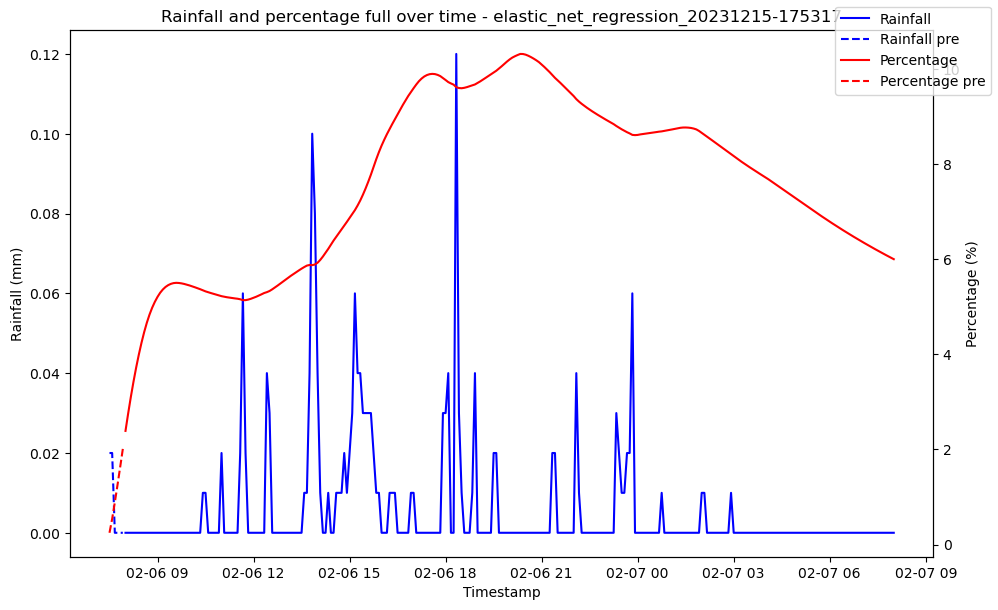

------------------------------------ lasso_regression_20231215-170317 ------------------------------------
Accuracy: 99.69%
Mean squared error: 1.5154437695312106
Variance (R²) score: 1.00


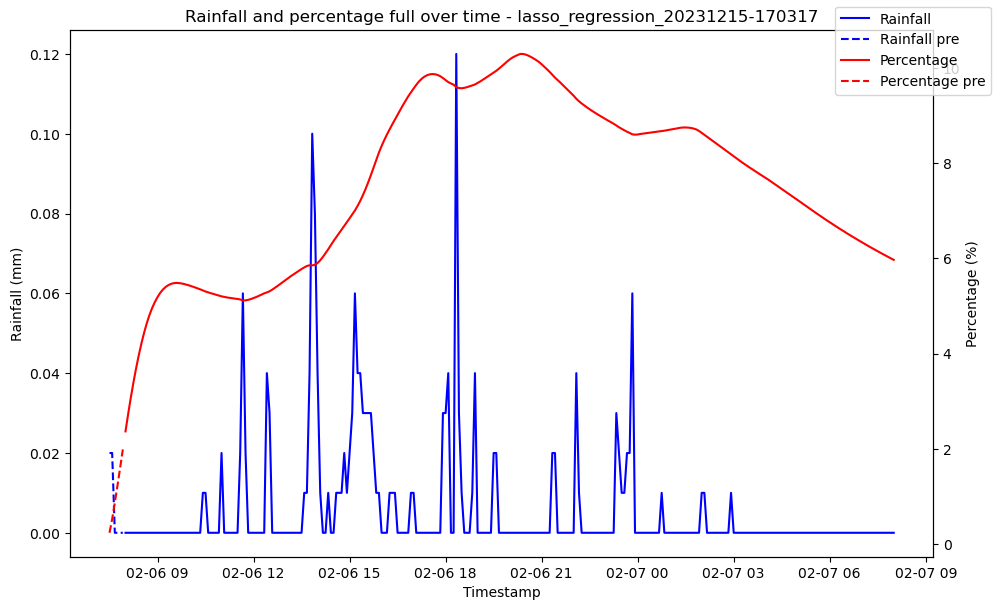

------------------------------------ linear_regression_20231215-203347 ------------------------------------
Accuracy: 99.69%
Mean squared error: 1.5380421396515942
Variance (R²) score: 1.00


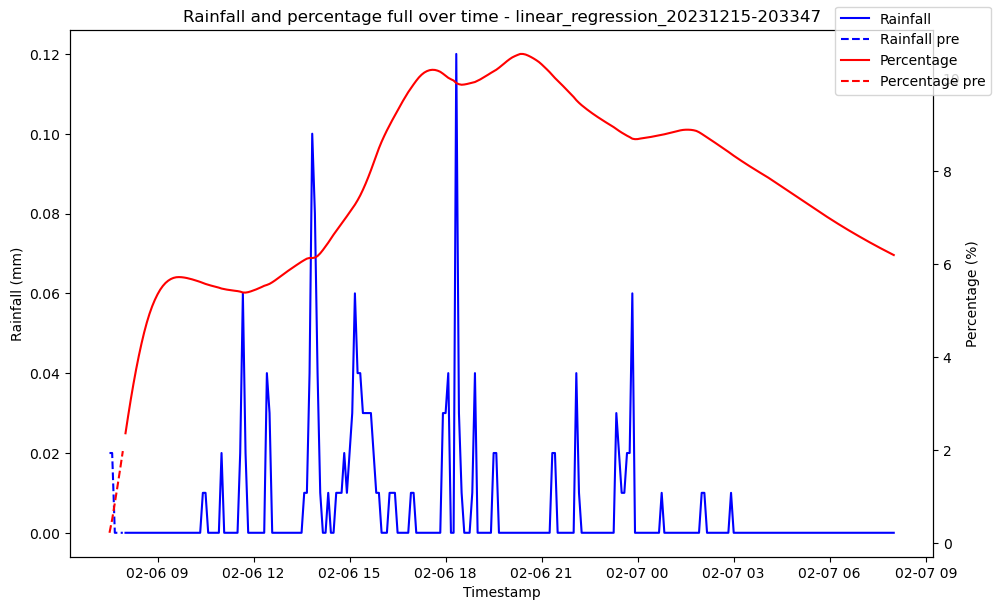

------------------------------------ ridge_regression_20231215-165723 ------------------------------------
Accuracy: 99.69%
Mean squared error: 1.5376128905858037
Variance (R²) score: 1.00


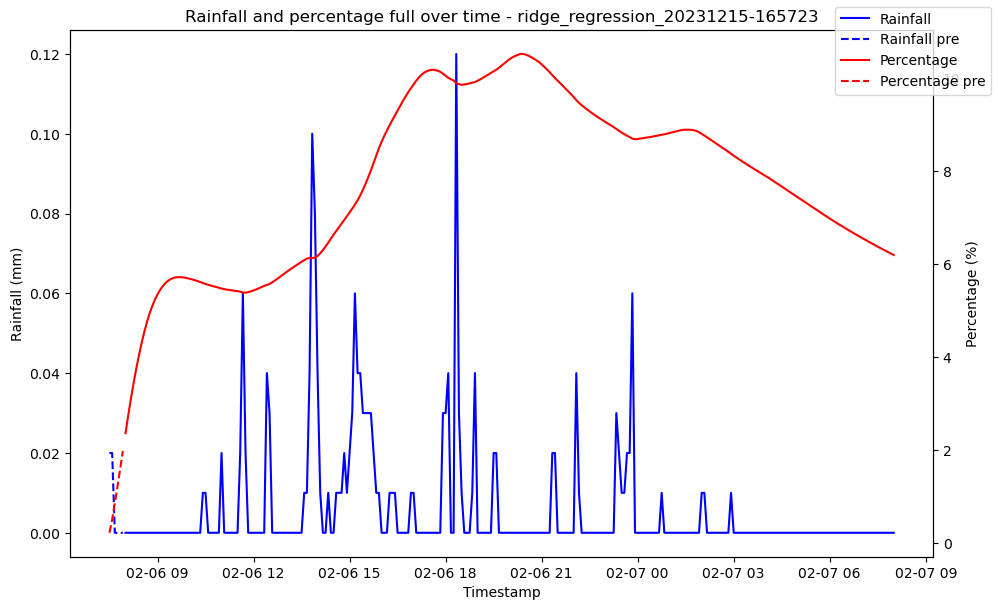

------------------------------------ randomforest_10 ------------------------------------
Accuracy: 99.2%
Mean squared error: 3.9801444308505576
Variance (R²) score: 0.99


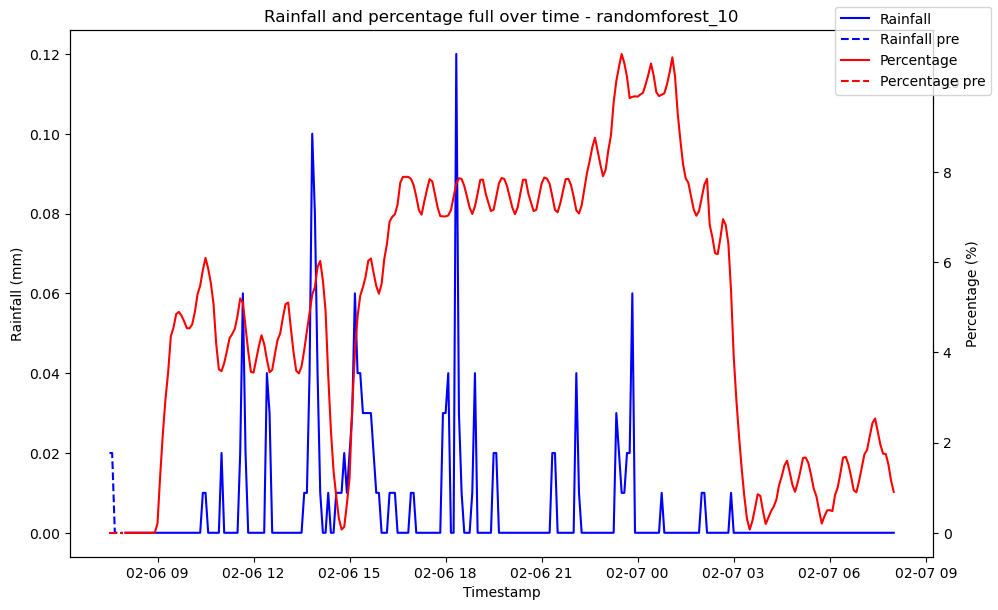

------------------------------------ randomforest_100 ------------------------------------
Accuracy: 99.31%
Mean squared error: 3.434825446083877
Variance (R²) score: 0.99


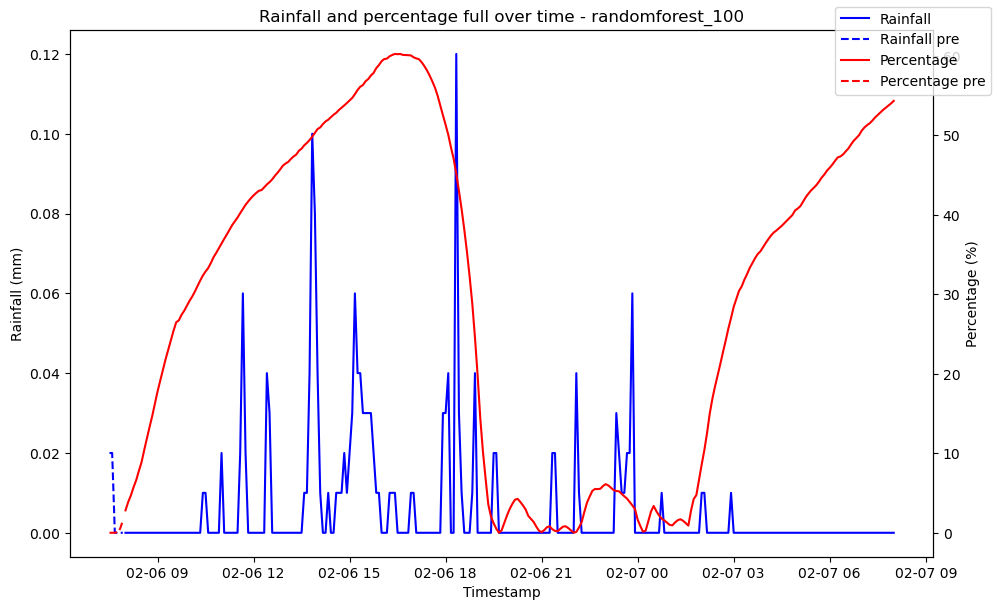

c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


------------------------------------ randomforest_14 ------------------------------------
Accuracy: 99.12%
Mean squared error: 4.347789408164561
Variance (R²) score: 0.99


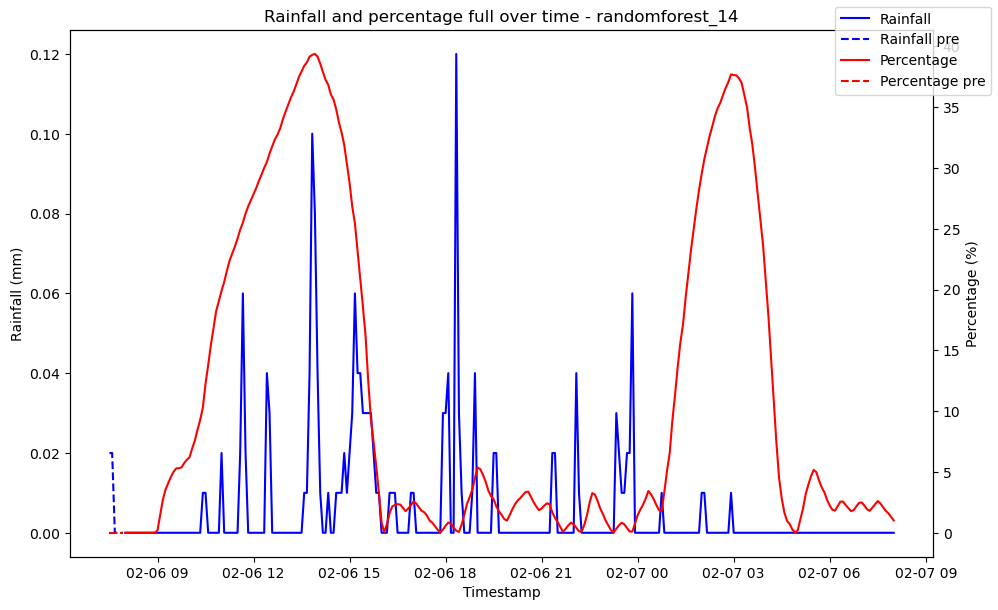

------------------------------------ randomforest_150 ------------------------------------
Accuracy: 99.32%
Mean squared error: 3.371915629553391
Variance (R²) score: 0.99


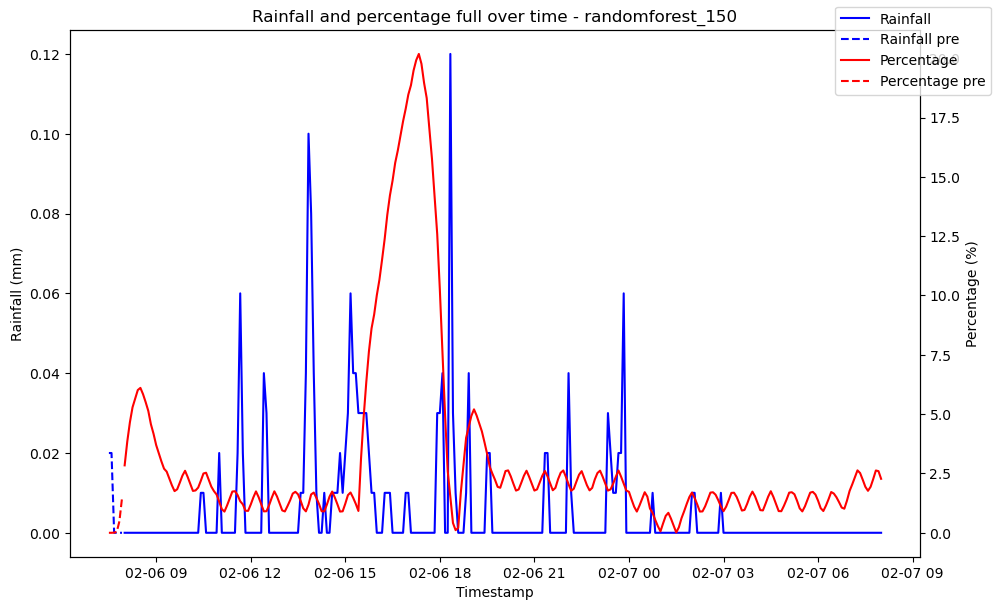

------------------------------------ randomforest_2-7 ------------------------------------
Accuracy: 99.66%
Mean squared error: 1.7048575403018165
Variance (R²) score: 1.00


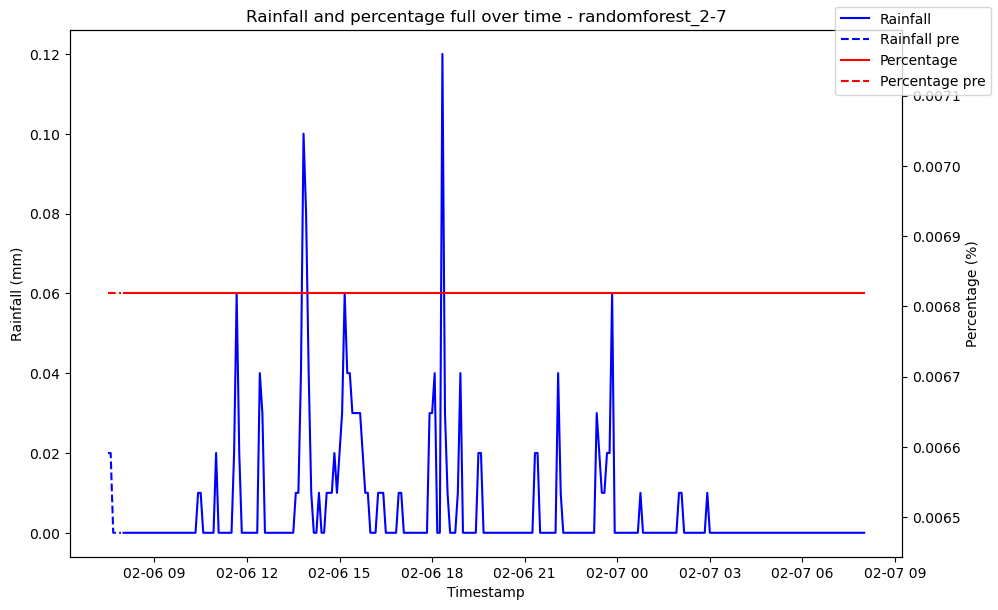

------------------------------------ randomforest_25 ------------------------------------
Accuracy: 99.24%
Mean squared error: 3.7811050342992902
Variance (R²) score: 0.99


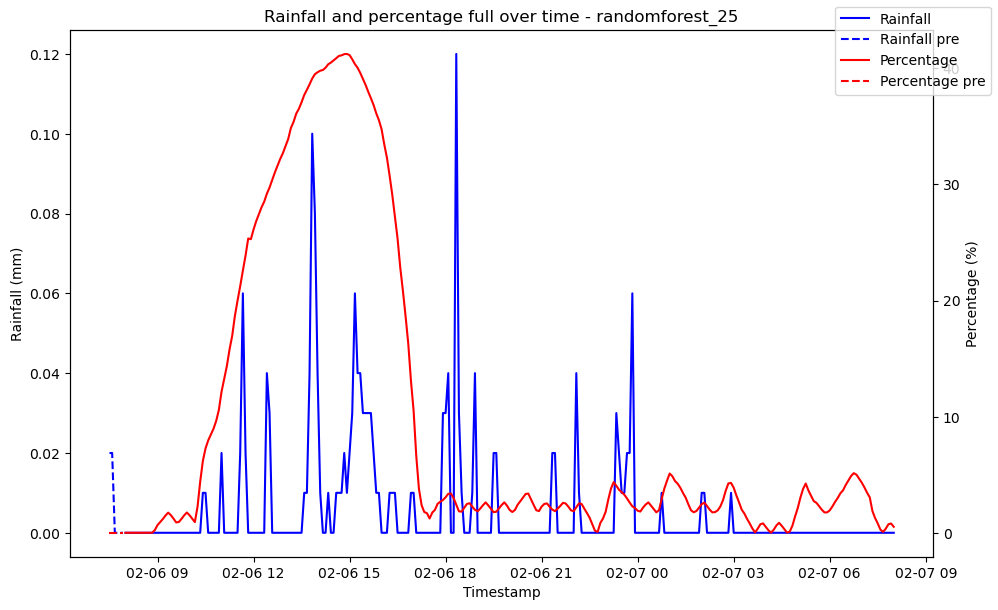

------------------------------------ randomforest_250 ------------------------------------
Accuracy: 99.33%
Mean squared error: 3.3104079090430245
Variance (R²) score: 0.99


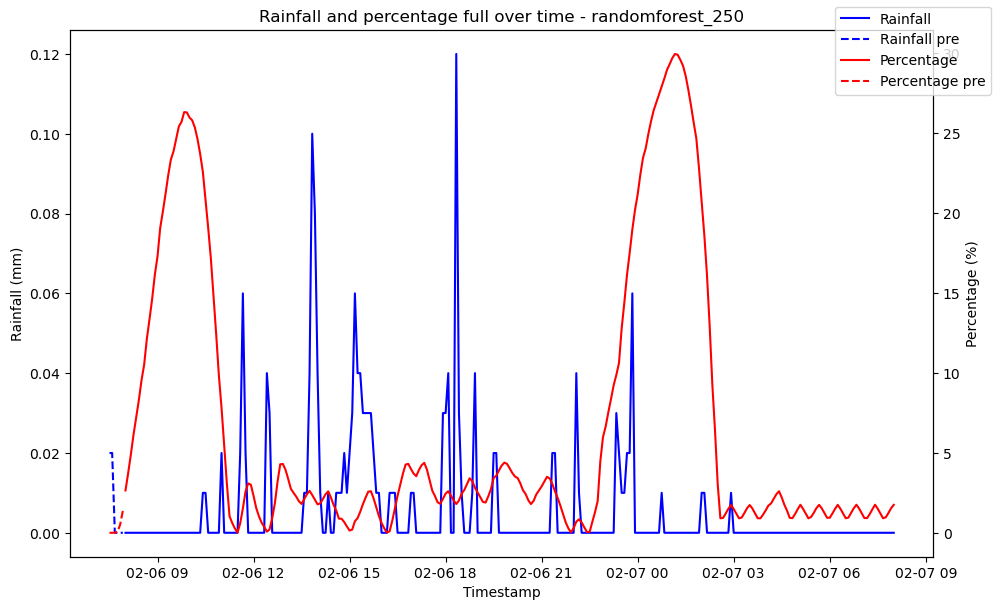

------------------------------------ randomforest_300 ------------------------------------
Accuracy: 99.34%
Mean squared error: 3.288393533613687
Variance (R²) score: 0.99


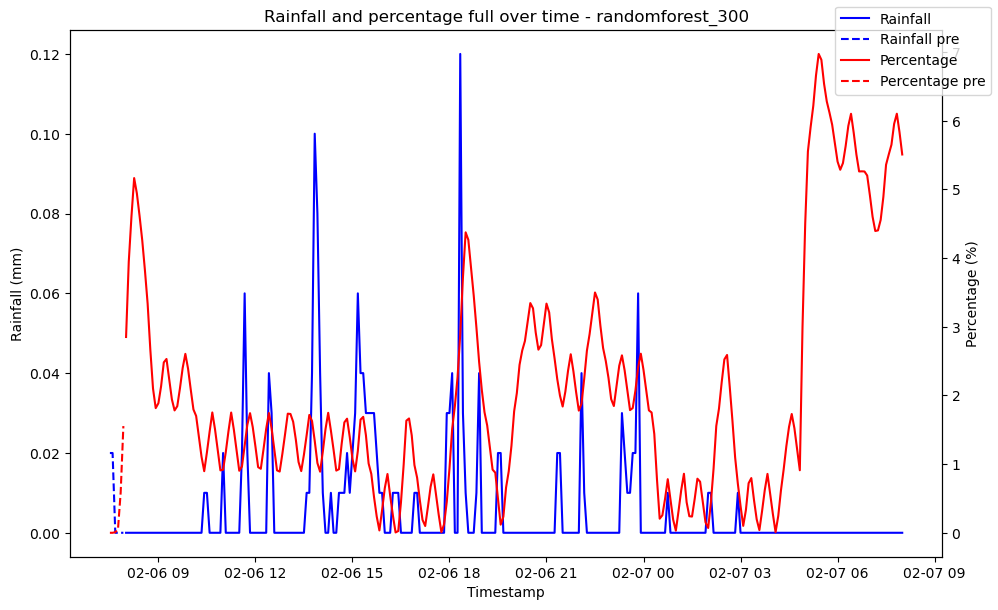

------------------------------------ randomforest_47_23_GS ------------------------------------
Accuracy: 99.32%
Mean squared error: 3.3553589651032487
Variance (R²) score: 0.99


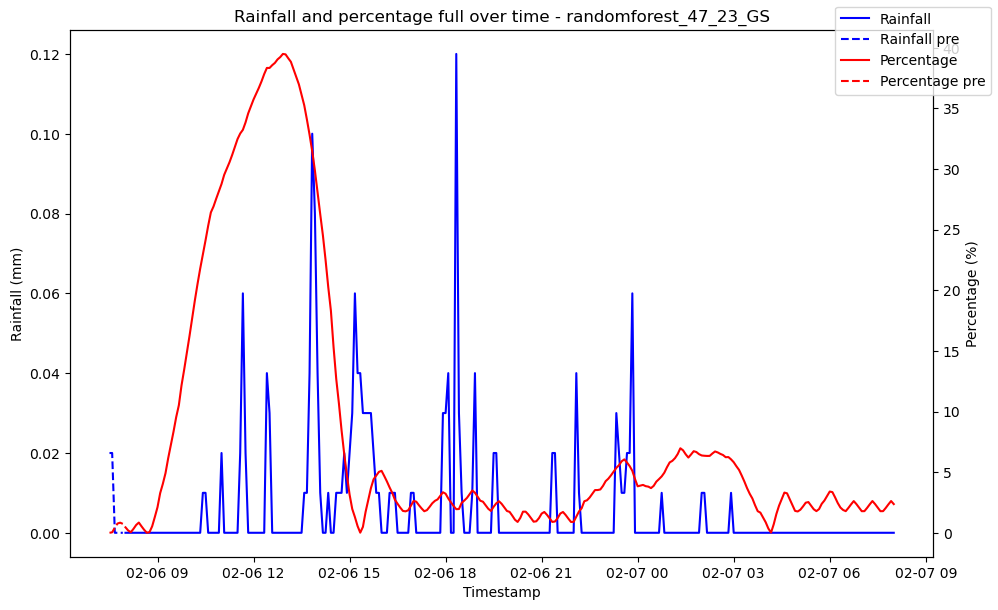

------------------------------------ randomforest_5 ------------------------------------
Accuracy: 99.18%
Mean squared error: 4.057810503214443
Variance (R²) score: 0.99


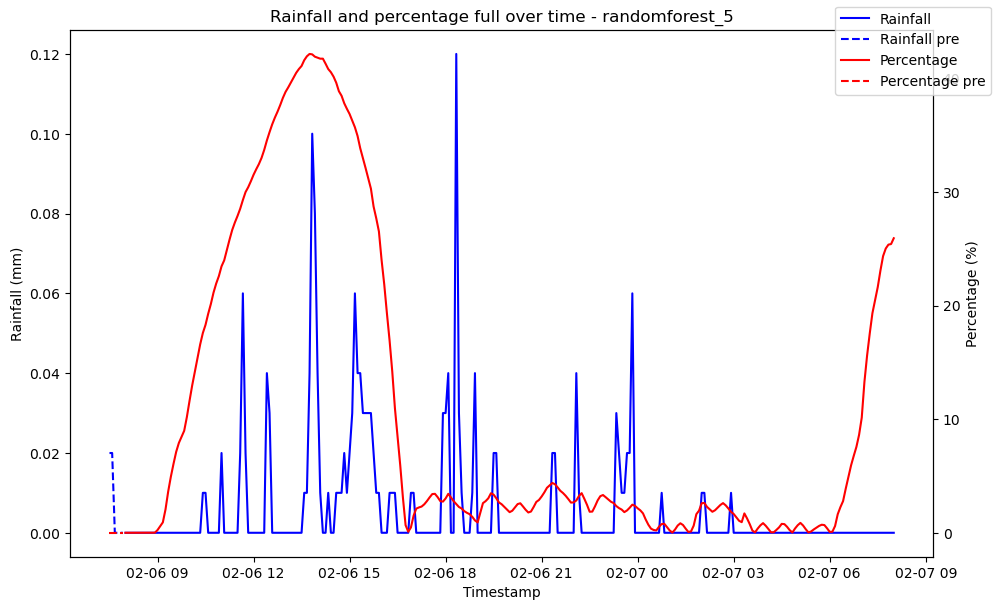

------------------------------------ randomforest_50 ------------------------------------
Accuracy: 99.28%
Mean squared error: 3.5679890977312425
Variance (R²) score: 0.99


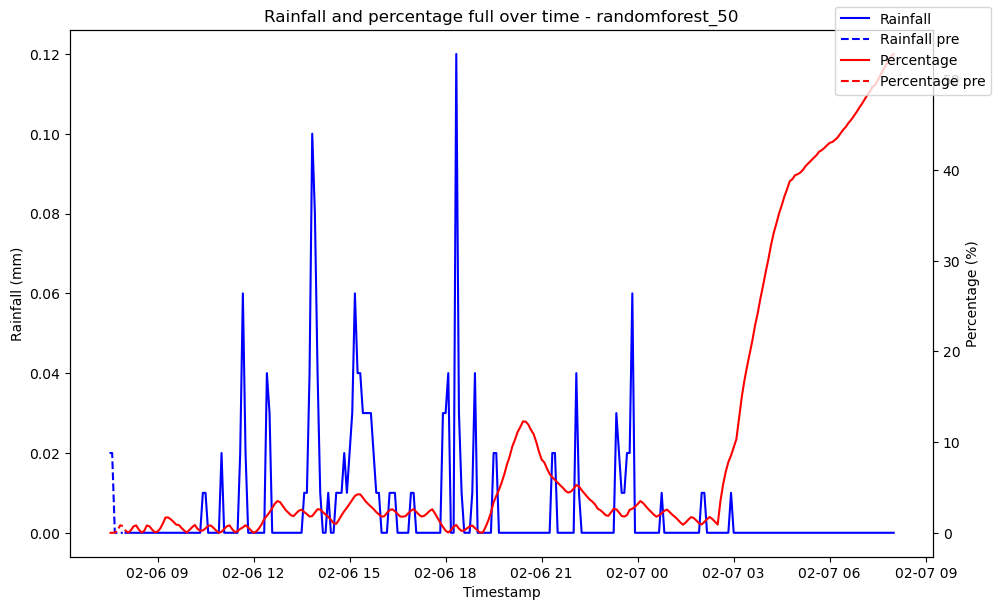

------------------------------------ randomforest_500 ------------------------------------
Accuracy: 99.36%
Mean squared error: 3.1896367293895977
Variance (R²) score: 0.99


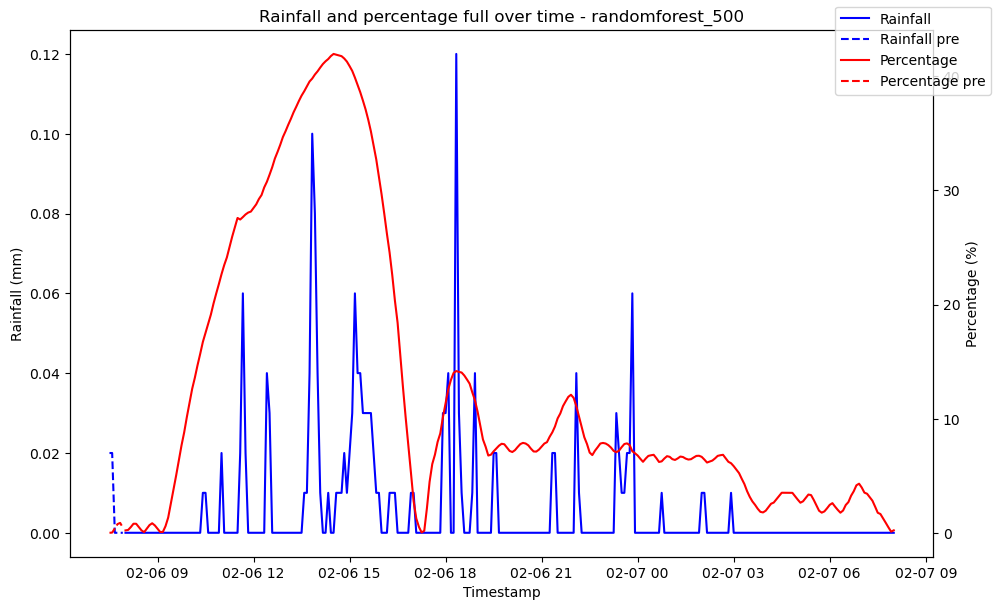

------------------------------------ randomforest_50_5 ------------------------------------
Accuracy: 99.61%
Mean squared error: 1.9220665478146859
Variance (R²) score: 1.00


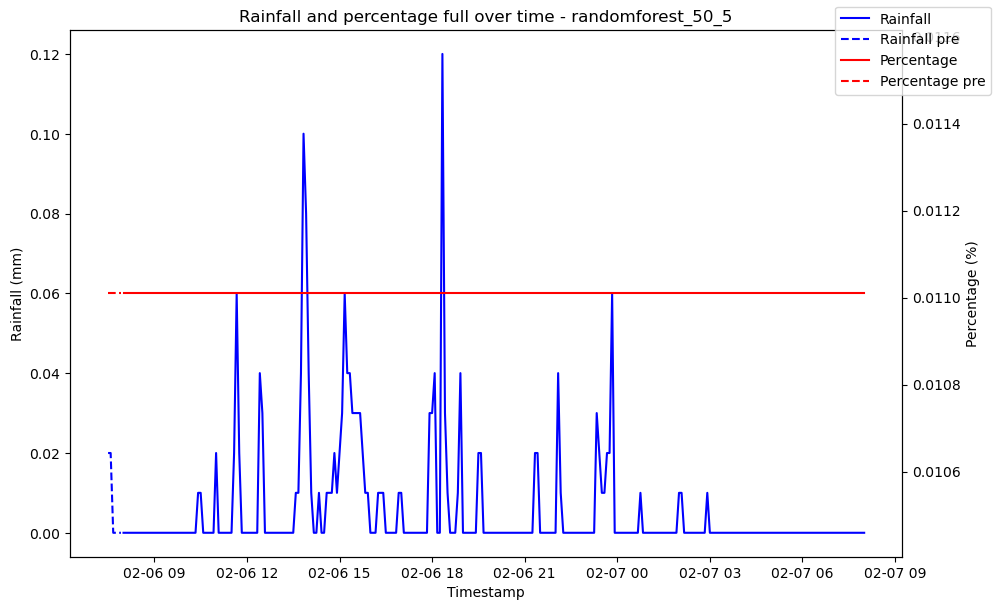

------------------------------------ randomforest_58 ------------------------------------
Accuracy: 99.33%
Mean squared error: 3.303596846549592
Variance (R²) score: 0.99


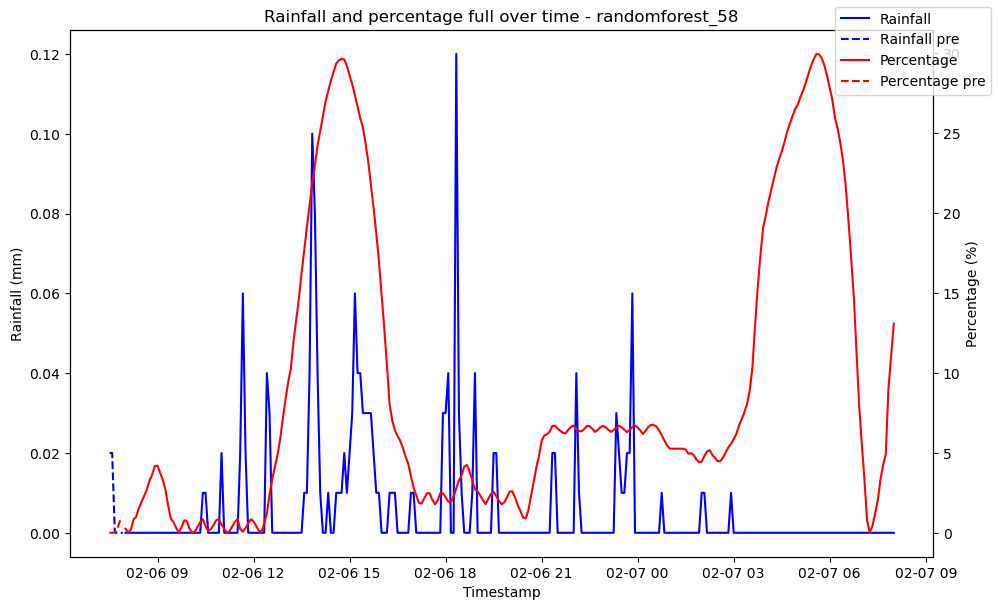

c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


------------------------------------ randomforest_gs_500 ------------------------------------
Accuracy: 99.12%
Mean squared error: 4.347789408164561
Variance (R²) score: 0.99


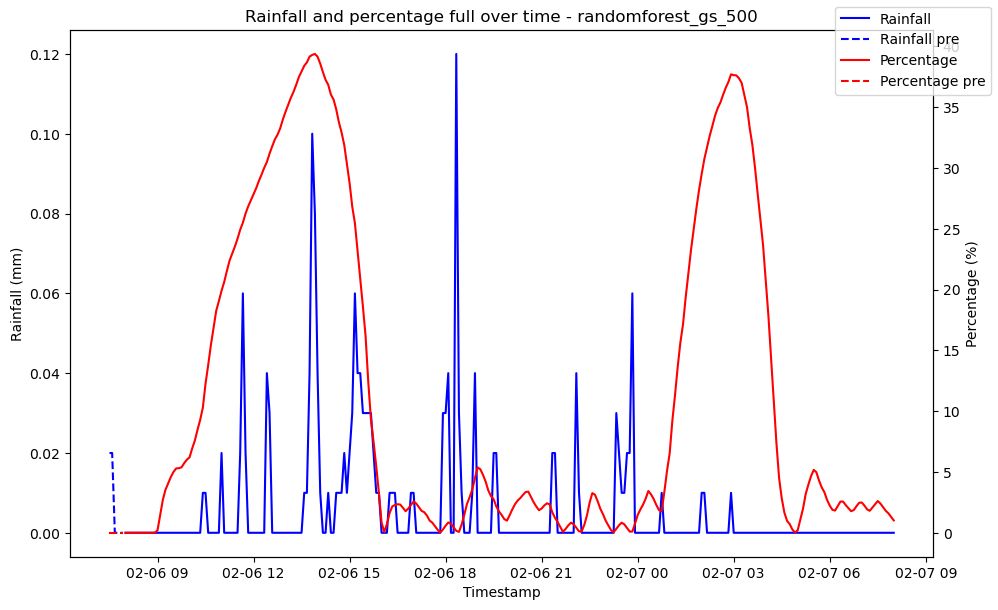

In [26]:
import glob

start_timestamp = pd.to_datetime('2024-02-06 08:00:00')
end_timestamp = pd.to_datetime('2024-02-07 08:00:00')

# if not train model
if not train_model:
    print('[[----- BEST MODELS ARE LOADED -----]]')
    # load all models from folder models\best_models, put them in a dictionary with the file name as key
    models = {}
    # files = glob.glob('models/best_models/model_*')
    files_linear = glob.glob('models/best_models/linear/model_*')
    files_randomforest = glob.glob('models/best_models/random_forest/model_*')

    files = files_linear + files_randomforest

    # Load the scaler from folder models\best_models
    scaler_path = glob.glob('models/best_models/scaler_*')
    scaler = pickle.load(open(scaler_path[0], 'rb'))

    for f in files:
        # model name is everything after model_ and before .pkl
        model_name = f.split('model_')[1].split('.pkl')[0]
        models[model_name] = pickle.load(open(f, 'rb'))

        # save models[model_name] to folder models\best_models with a timestamp in the name
        filename = f'models/best_models/model_{model_name}_{datetime.now().strftime("%Y%m%d-%H%M%S")}.pkl'

        predict_test_plot(models[model_name], scaler, model_name, start_timestamp, end_timestamp, weather_data_6_months_later, 'polygon_1663')
else:
    print('[[----- NEW MODEL USED -----]]')

    pred_df, pre_pred_df = create_predictions_df(start_timestamp, end_timestamp, weather_data_6_months_later, model, scaler, 'polygon_1663')

    plot_predictions_and_rainfall(pred_df, pre_pred_df, 'new model')

    # write pred_df to excel in folder predictions
    pred_df.to_excel('predictions/pred_df_' + datetime.now().strftime("%Y%m%d-%H%M%S") + '.xlsx', index=False)
    pre_pred_df.to_excel('predictions/pre_pred_df_' + datetime.now().strftime("%Y%m%d-%H%M%S") + '.xlsx', index=False)